# ANOVA (Análisis de Varianza)

Es una técnica estadística que se utiliza para analizar las diferencias entre las medias de varias muestras y determinar si hay una diferencia significativa entre ellas. Es útil cuando tenemos más de dos grupos y queremos saber si al menos uno de ellos es significativamente diferente de los demás.

One-way ANOVA results:
            sum_sq     df         F    PR(>F)
C(Team)   0.016085    9.0  1.872382  0.053867
Residual  0.467701  490.0       NaN       NaN


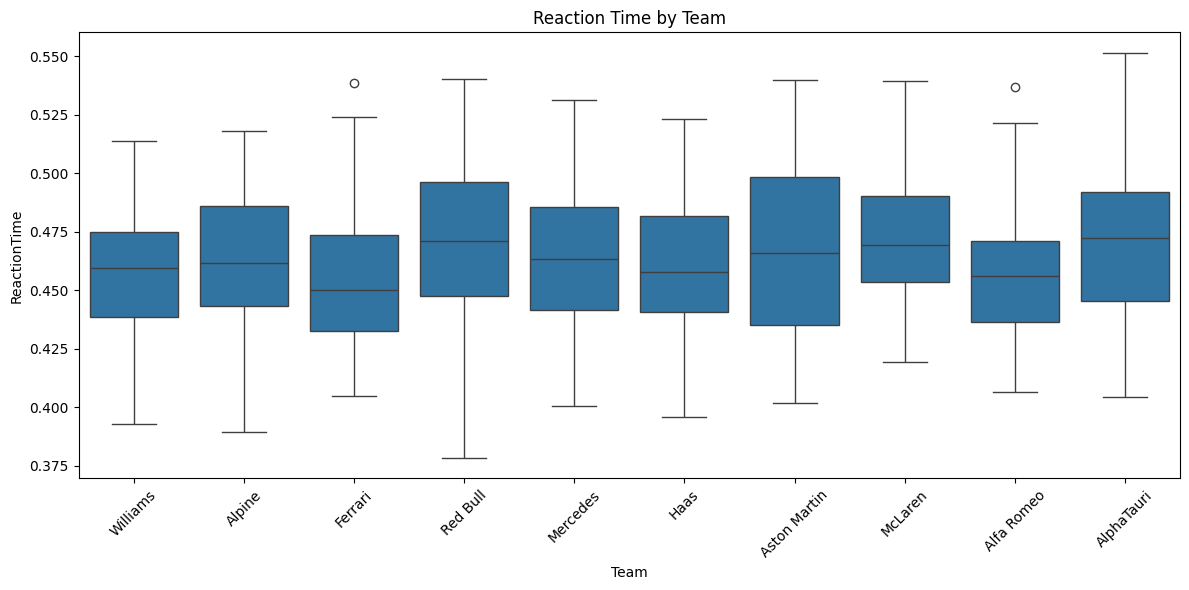


Tukey's HSD Test results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
  Alfa Romeo   AlphaTauri   0.0114 0.7784 -0.0096 0.0325  False
  Alfa Romeo       Alpine   0.0027    1.0 -0.0182 0.0235  False
  Alfa Romeo Aston Martin   0.0095 0.8571 -0.0096 0.0286  False
  Alfa Romeo      Ferrari   -0.003    1.0  -0.022 0.0161  False
  Alfa Romeo         Haas   0.0027    1.0 -0.0162 0.0216  False
  Alfa Romeo      McLaren   0.0128 0.4786 -0.0059 0.0315  False
  Alfa Romeo     Mercedes   0.0048 0.9986 -0.0143  0.024  False
  Alfa Romeo     Red Bull   0.0118 0.6701 -0.0079 0.0314  False
  Alfa Romeo     Williams   -0.002    1.0 -0.0209 0.0169  False
  AlphaTauri       Alpine  -0.0088 0.9669 -0.0315 0.0139  False
  AlphaTauri Aston Martin   -0.002    1.0  -0.023 0.0191  False
  AlphaTauri      Ferrari  -0.0144 0.4744 -0.0354 0.0066  False
  AlphaTauri 

<Figure size 1200x800 with 0 Axes>

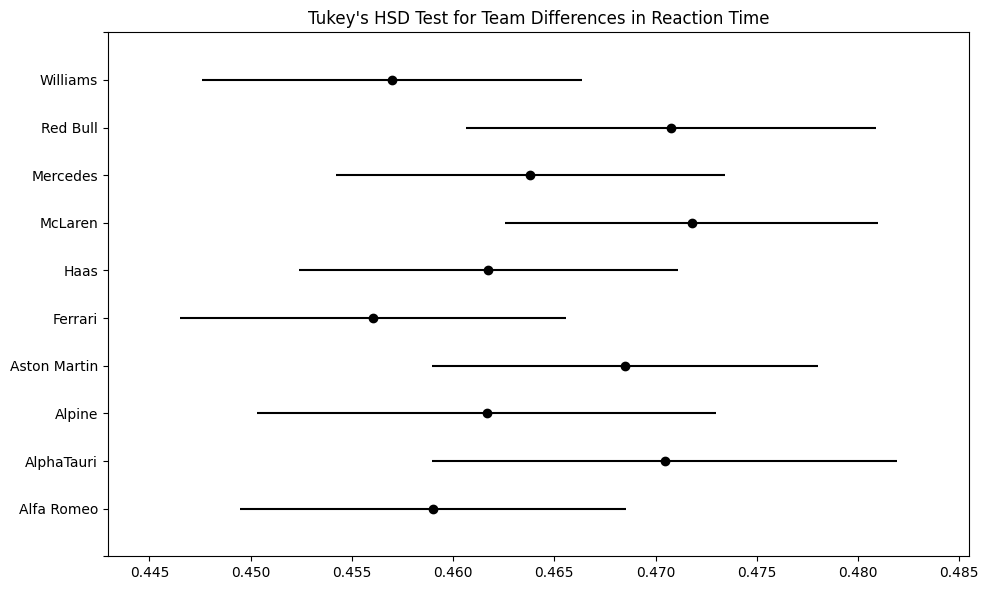


Top 5 teams with fastest mean reaction times:
Team
Ferrari       0.456037
Williams      0.456987
Alfa Romeo    0.458999
Alpine        0.461651
Haas          0.461745
Name: ReactionTime, dtype: float64

Bottom 5 teams with slowest mean reaction times:
Team
Mercedes        0.463822
Aston Martin    0.468486
AlphaTauri      0.470444
Red Bull        0.470752
McLaren         0.471795
Name: ReactionTime, dtype: float64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the data
data = pd.read_csv("formula1_enhanced_data_final.csv")

# Prepare the data for ANOVA
# We'll use 'Team' as the independent variable and 'ReactionTime' as the dependent variable
data['ReactionTime'] = pd.to_numeric(data['ReactionTime'], errors='coerce')
data = data.dropna(subset=['Team', 'ReactionTime'])

# Perform one-way ANOVA
model = ols('ReactionTime ~ C(Team)', data=data).fit()
anova_table = anova_lm(model, typ=2)

print("One-way ANOVA results:")
print(anova_table)

# Calculate mean reaction times for each team
team_means = data.groupby('Team')['ReactionTime'].mean().sort_values()

# Visualize the results
plt.figure(figsize=(12, 6))
sns.boxplot(x='Team', y='ReactionTime', data=data)
plt.title('Reaction Time by Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Post-hoc test (Tukey's HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data['ReactionTime'], data['Team'])

print("\nTukey's HSD Test results:")
print(tukey_results)

# Visualize Tukey's test results
plt.figure(figsize=(12, 8))
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Test for Team Differences in Reaction Time")
plt.tight_layout()
plt.show()

print("\nTop 5 teams with fastest mean reaction times:")
print(team_means.head())

print("\nBottom 5 teams with slowest mean reaction times:")
print(team_means.tail())